In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [27]:
# We read the parquet and turn it into a dataframe
df = pd.read_parquet('df.parquet.gzip')  

In [28]:
'''
Lineal Regression Models
'''

'\nLineal Regression Models\n'

In [29]:
# We first have to create the correlation matrix to analyze if there are any values higher than .9
correlation_matrix = df.corr().round(2)

correlation_matrix

,Ratio,Players,AvgCompleted,Time,Rating,MaxGameScore,AvgGameScore
Ratio,1.00,0.09,0.78,-0.34,0.16,-0.59,-0.15
Players,0.09,1.00,-0.13,0.17,0.36,0.19,0.48
AvgCompleted,0.78,-0.13,1.00,-0.29,-0.04,-0.34,-0.17
Time,-0.34,0.17,-0.29,1.00,0.18,0.36,0.31
Rating,0.16,0.36,-0.04,0.18,1.00,-0.02,0.23
MaxGameScore,-0.59,0.19,-0.34,0.36,-0.02,1.00,0.72
AvgGameScore,-0.15,0.48,-0.17,0.31,0.23,0.72,1.00


<AxesSubplot:>

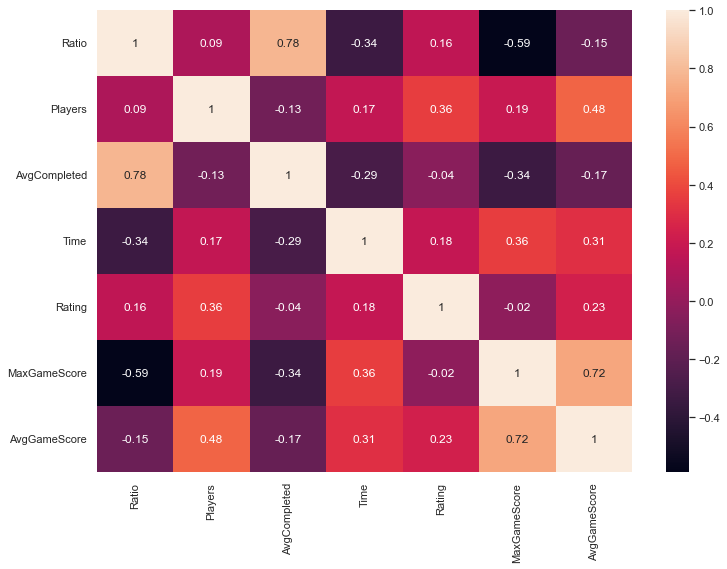

In [30]:
# We can create a heat map to better visualize it
sns.set(rc={'figure.figsize':(12,8.5)})
sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
# 1. Y: Players X: Rating, Ratio
from sklearn.model_selection import train_test_split

# df.sort_values(by='Players', ascending=False)
# df = df.head(100)

# Players as Y
# X = pd.DataFrame(np.c_[df['Rating'], df['Time'], df['MaxGameScore']], columns = ['Rating', 'Time', 'MaxGameScore'])
# X = pd.DataFrame(np.c_[df['Rating'], df['Ratio']], columns = ['Rating','Ratio'])
# X = pd.DataFrame(np.c_[df['Ratio'], df['Time']], columns = ['Ratio', 'Time'])
# X = pd.DataFrame(np.c_[df['Rating'], df['Ratio'], df['Time']], columns = ['Rating','Ratio', 'Time'])
# Y = df['Players']

# Rating as Y
Y = df['Players']
# X = pd.DataFrame(np.c_[df['Ratio'], df['Time']], columns = ['Ratio', 'Time'])
X = pd.DataFrame(np.c_[df['Ratio'], df['Time'], df['AvgCompleted'], df['Rating']], columns = ['Ratio', 'Time', 'AvgCompleted', 'Rating'])

# Ratio as Y
# X = pd.DataFrame(np.c_[df['Rating'], df['Time']], columns = ['Rating', 'Time'])
# Y = df['Ratio']

# Create train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [32]:
# Sort values depending of the amount of players
# df.sort_values(by='Players', ascending=False)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [34]:
# Model Evaluation
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 79203.08810373188
R2 score is 0.22389917557130057


The model performance for testing set
--------------------------------------
RMSE is 70630.60492780467
R2 score is 0.030702531935848376


In [35]:
# Creación de DF para graficación y comprensión

comp_t = pd.DataFrame({'Test': Y_test})
comp_t.reindex(method='bfill')
comp_t.index = range(comp_t.shape[0])
comp_p = pd.DataFrame({'Pred': y_test_predict})

#print(comp_t,round(comp_p,1))

comp = pd.merge(comp_t,comp_p,left_index=True, right_index=True)
# comp

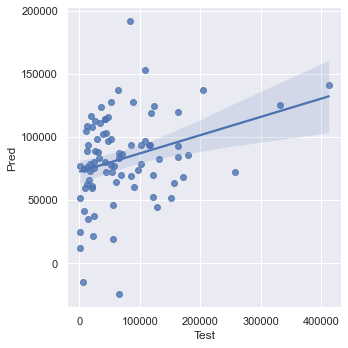

In [36]:
sns.lmplot(x='Test',y='Pred',data=comp)

In [37]:
# Query to receive the outlier
comp.query('Pred > 30')
# Here we are deleting the outlier
comp = comp.drop(labels=[30], axis=0)

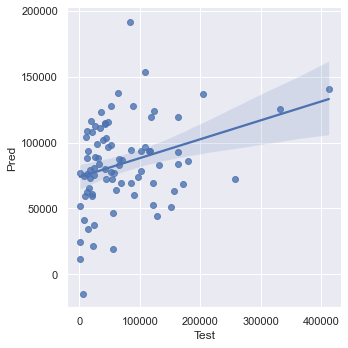

In [38]:
sns.lmplot(x='Test',y='Pred',data=comp)